## Product Sales Prediction using Time Series

### Using wget/gdown to download CSV file from Google Drive

In [1]:
!gdown 'https://drive.google.com/uc?id=1xcaBvZ_8xWX-X3NgVMaNrjwIJwe7kT7T'

Downloading...
From: https://drive.google.com/uc?id=1xcaBvZ_8xWX-X3NgVMaNrjwIJwe7kT7T
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Sales of Product Prediction - Time Series /sales.csv
100%|██████████████████████████████████████| 1.60k/1.60k [00:00<00:00, 2.22MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [3]:
import os
working_dir = os.getcwd()
print(working_dir)

/Users/nathalia/Personal/code-practice/Data Science Projects/Sales of Product Prediction - Time Series 


In [4]:
data_path = working_dir + '/sales.csv'

### Turn data from CSV file into a DataFrame

In [5]:
df= read_csv(data_path)

# Results
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (107, 2)


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.columns=['Month', 'Sales']

In [7]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df.shape

(107, 2)

### Perform Data Cleaning on data

In [9]:
# Check null values
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [10]:
# Check last rows of the dataframe
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [11]:
# Remove null values
# axis=0 -> remove in horizontal way
# inplace=True -> update dataframe
df.drop(106, axis=0, inplace=True)

In [12]:
df.drop(105, axis=0, inplace=True)

In [13]:
df.shape

(105, 2)

In [14]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [15]:
# Convert into date time format
df['Month']=pd.to_datetime(df['Month'])

In [16]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [17]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [18]:
# In ML -- indexes are numbers
# In Time Series -- indexes must be time related (Month)
# Thus, set Month to index 
df.set_index('Month', inplace=True)

In [19]:
# Thus Month becomes my index
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


#### Descriptive Statistics

In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Visualize Sales column

<AxesSubplot: xlabel='Month'>

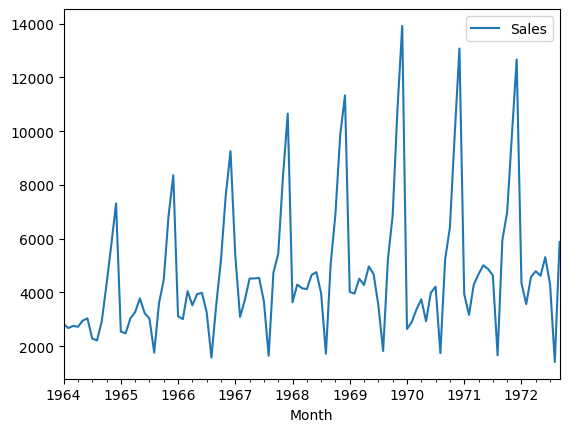

In [21]:
# Plot Sales with respecto to Month
df.plot()

There is some kind of seasonality on my data (Seasonal data)
- In christmas -> sales go up
- After christmas -> sales go down

Thus, estationarity is not available in data

### Check if data is stationary or not

##### Use Augmented Dickey-Fuller Test (ADF)

Use statistical test to cross-check if there is some kind of stationary data. This returns p-values (prob value).

- p-value < 0.05 -> data is Stationary
- p-value > 0.05 -> data is NOT Stationary

In [22]:
# !pip install statsmodels

In [23]:
from statsmodels.tsa.stattools import adfuller

adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
- most imp is p-value 

This is almost similar to Hypothesis testing,

- whereas Null hypo, which says Data is not Stationery
- whereas Alternate hypo says data is Stationery

In [24]:
test_result = adfuller(df['Sales'])
test_result

(-1.8335930563276166,
 0.36391577166024813,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [25]:
#zip basically combines result,labels

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print('{} : {} '.format(label, value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis (accept alternate hypothesis). Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, accept the null hypothesis. Time series has a unit root, indicating it is non-stationary ")

In [26]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276166 
p-value : 0.36391577166024813 
#Lags Used : 11 
Number of Observations Used : 93 
Weak evidence against null hypothesis, accept the null hypothesis. Time series has a unit root, indicating it is non-stationary 


If our data is non-stationery,we have to make it stationary using various techniques such as Differencing & many more

Time Series has as condition: Stationary data -> data that I have to predict must follow a Stationary nature

### Making Data Stationary by using Differencing

In [27]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [28]:
# Shift value one value down
df['Sales'].shift(1) #shift values in the right side

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [31]:
#why taken shift(12),bcs basically year has 12 month cycle
df['Seasonal First Difference']=df['Sales'] - df['Sales'].shift(12)

In [32]:
df.head(20)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


Look if Seasonal First Difference has a Stationary trend or not, then I use Augmented Dickey-Fuller Test

In [33]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164 
p-value : 2.060579696813685e-11 
#Lags Used : 0 
Number of Observations Used : 92 
Strong evidence against the null hypothesis(Ho), reject the null hypothesis (accept alternate hypothesis). Data has no unit root and is stationary


Now, it can be seen that this has a very low probability value (p-value).

Thus data is stationary now

If p-value is almost 0,then we have a wonderful stationery graph

<AxesSubplot: xlabel='Month'>

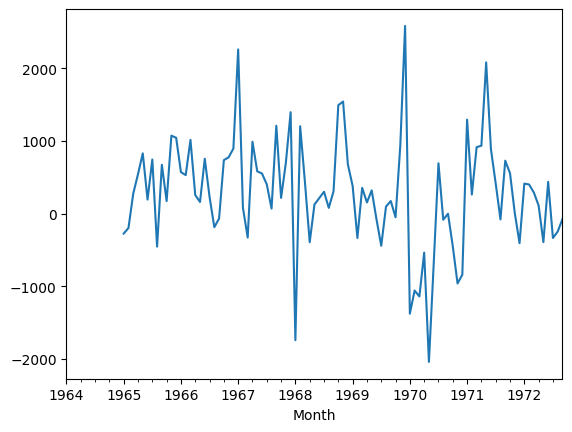

In [35]:
# See the trend of this feature
df['Seasonal First Difference'].plot()

### ARIMA algorithm 

- AR -> Auto regressive model
- I -> Integrating
- MA -> Moving average

(p, d, q)
- p: pacf graph
- d=1
- q: acf graph

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
df.head(15)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [39]:
import matplotlib.pyplot as plt

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


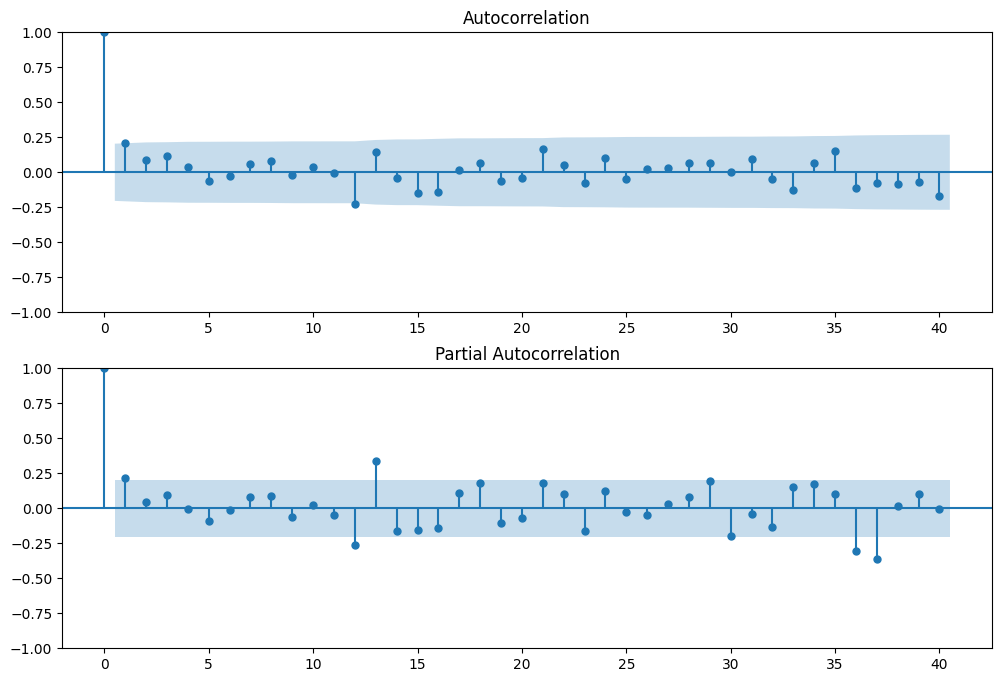

In [40]:
# iloc[13:] => index location from 13 to end
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)

ax2= fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40, ax=ax2)

For non-seasonal data: 
p=1, d=1, q=1

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model=ARIMA(df['Sales'],order=(1,1,1))
model=model.fit()

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 17 Feb 2023   AIC                           1911.627
Time:                        19:20:22   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Make predictions with ARIMA model

In [57]:
df.shape

(105, 4)

In [58]:
df['forecast']=model.predict(start=90, end=103, dynamic=True)
df.tail(20)

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4977.053461
1971-08-01,1659.0,-2974.0,-79.0,5023.890798
1971-09-01,5951.0,4292.0,730.0,5045.178158
1971-10-01,6981.0,1030.0,557.0,5054.853167


<AxesSubplot: xlabel='Month'>

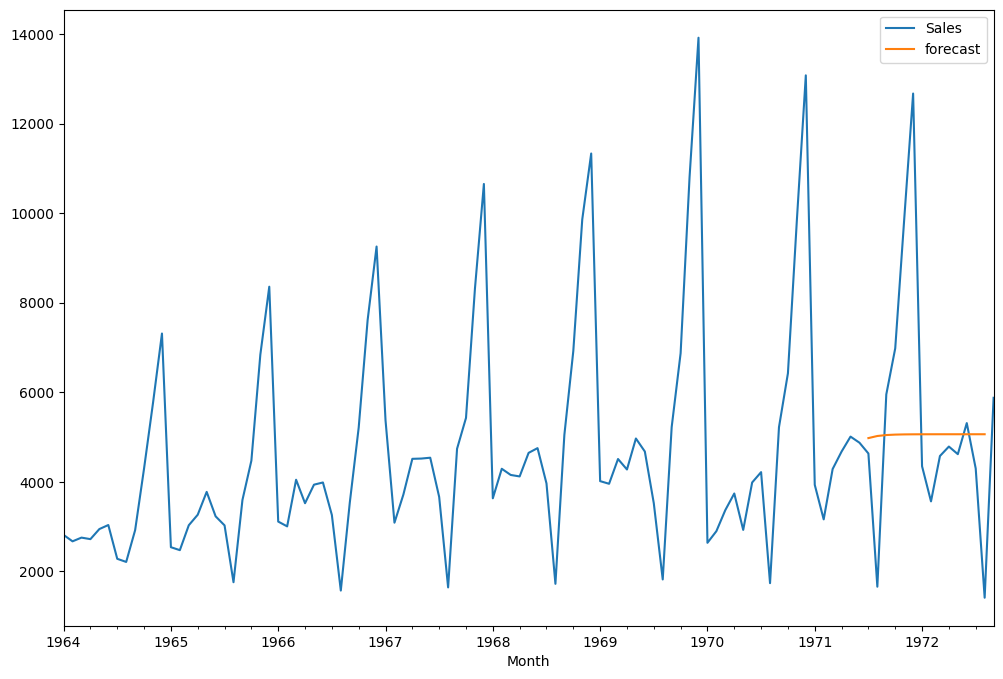

In [84]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

As can be seen, the prediction is far away from real values. 

Thus, ARIMA is not suitable for seasonal data.

Then, I need to use SARIMAX (seasonal ARIMA algorithm)

### SARIMAX Model

In [85]:
import statsmodels.api as sm

In [86]:
# seasonal_order=(1,1,1,12)
# (p,d,q,shift_values)

In [87]:
model_sm = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model_sm.fit()

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99461D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05906D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18410D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06328D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.48342D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [88]:
#predicting from index 90 to 103
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

In [89]:
df.tail(20)

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,4977.053461,4437.324163
1971-08-01,1659.0,-2974.0,-79.0,5023.890798,2050.747445
1971-09-01,5951.0,4292.0,730.0,5045.178158,5493.376381
1971-10-01,6981.0,1030.0,557.0,5054.853167,6752.039116


<AxesSubplot: xlabel='Month'>

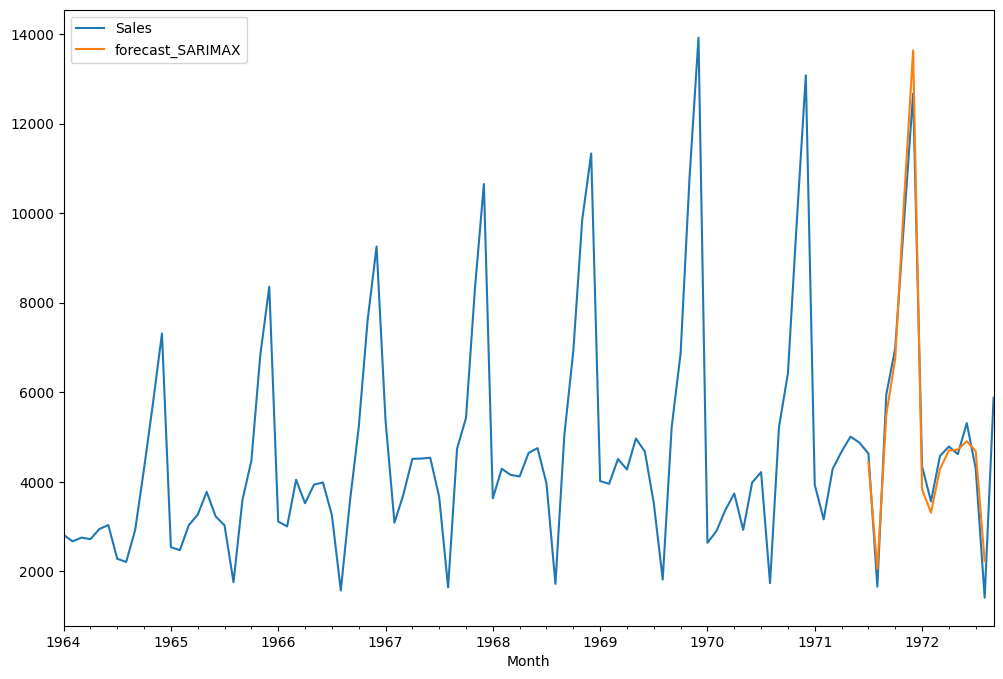

In [90]:
#blue line is original data and orange is a forecasted data
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

### Create additional data and do prediction over them

Dateoffset to create additional dataset

In [91]:
from pandas.tseries.offsets import DateOffset

In [92]:
# Get the last timestamp from dataframe
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [93]:
# Add date for 24 months
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [94]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [95]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [96]:
future_dataset_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [97]:
future_dataset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [98]:
future_df = pd.concat([df, future_dataset_df])

In [99]:
# The initial dataset had 107 rows, now with future dates, there are 128 rows
future_df.shape

(128, 5)

In [107]:
future_df['forecast_SARIMAX2'] = results.predict(start = 104, end = 124, dynamic= True)

<AxesSubplot: >

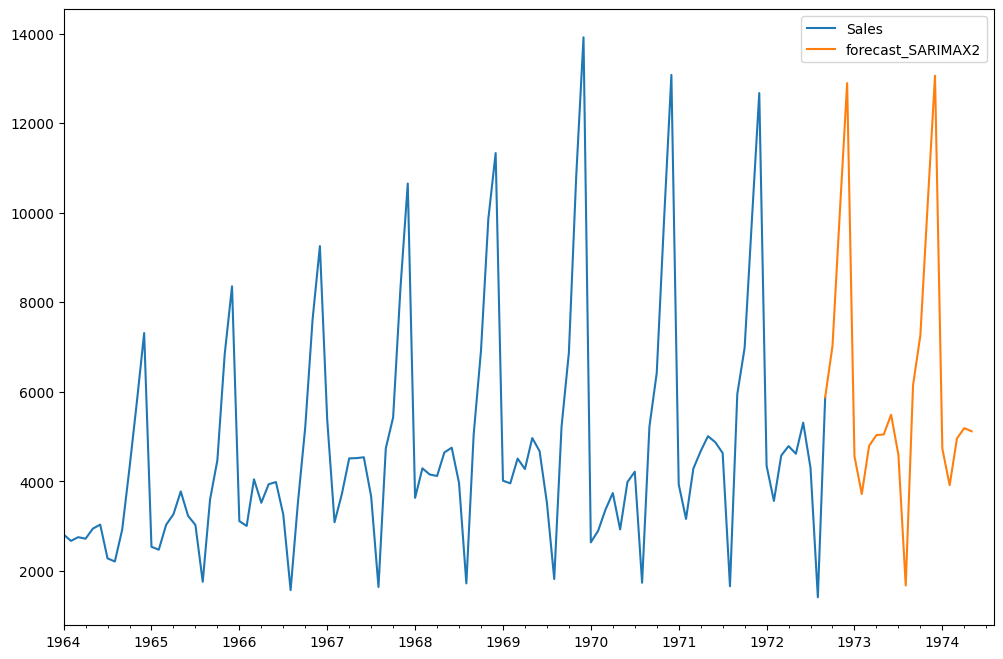

In [109]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12, 8))

### Remove file downloaded in the path after finishing with the project

In [ ]:
os.remove(data_path)